In [1]:
#### calcualte the distance between ASm6A and m6A peak
from scipy import stats

unsig_dir = "/Charles/project/ASm6A/Hypothesis_test/ASm6A/unsig/contained_m6A/rename/"
# asm6a_dir = "/Charles/project/ASm6A/ASm6A/withPeak/"
# unsig_dir = ""
asm6a_dir = "/Charles/project/ASm6A/ASm6A/common_ASm6A/totaltissues/by_sample/overlap_peak/"
sample_list = glob.glob("%s/*.bed" % asm6a_dir)

### calculate distance and reformat data
def calc_dist(asm6a, dat_type):  # dat_type: ASm6A or unsig
    df = pd.read_table(asm6a, header=None)
    df['peak_center'] = (df.iloc[:, 8] + df.iloc[:, 7]) / 2
    df['dist'] = (df['peak_center'] - df.iloc[:, 2])
    df['dist'] = df['dist'].abs()
    df_final = df.iloc[:, [0, 1, 2, 9, -1]]
#     df_final = df.iloc[:, [0, 1, 2, 3, 9, -1]] ### 临时补充
    df_final.columns = [
        'chr_%s' % dat_type,
        'start_%s' % dat_type,
        'end_%s' % dat_type,
#         ### 临时补充
#         'infp_%s' % dat_type,
#         ###
        'peak_%s' % dat_type,
        'dist_%s' % dat_type
    ]
    return df_final

## select control which deposited in the same peak with ASm6A
def select_cont(asm6a, unsig):
    df = calc_dist(asm6a, "ASm6A")
    df_unsig = calc_dist(unsig, "Unsig")
    df = df.merge(df_unsig, left_on="peak_ASm6A", right_on="peak_Unsig").dropna()
#     ### 临时补充
#     tmp_dir = "/Charles/project/ASm6A/ASm6A/distance2peakCenter/unsig/"
#     res = os.path.join(tmp_dir, os.path.basename(asm6a))
#     df.to_csv(res, sep="\t", header=False, index=False)
    ###
    return df

#### test the significance
asm6a_list, unsig_list = [], []
for asm6a in sample_list:
    unsig = os.path.join(unsig_dir, os.path.basename(asm6a))
    if (os.path.getsize(asm6a)) and (os.path.getsize(unsig)):
        df_com = select_cont(asm6a, unsig)
        asm6a_list += df_com['dist_ASm6A'].tolist()
        unsig_list += df_com['dist_Unsig'].tolist()
t, pvalue = stats.ttest_rel(asm6a_list, unsig_list)
print(np.mean(asm6a_list), np.mean(unsig_list), t, pvalue)

497.50463559103787 520.2790368271955 -2.467104692393408 0.013663908783927738


In [3]:
(ks_stat, pval) = stats.ks_2samp(asm6a_list, unsig_list)
print(ks_stat, pval)

0.03914499098635076 0.005207552606969521


In [40]:
#### stat proportion of distance within each 100bp bin
import numpy
from collections import Counter

# data = [0,99,100,200,600,500,800,1000,1002]
def count_number_eachBin(data_list):
    bins = numpy.linspace(0, 1000, 11)
    print(bins)
    digitized = numpy.digitize(data_list, bins)
    print(digitized)
    count = Counter(digitized)
    return count

asm6a_count = count_number_eachBin(asm6a_list)
unsig_count = count_number_eachBin(unsig_list)
for i in range(1,11):
    # print(i)
    print(asm6a_count[i], unsig_count[i])
print(len(asm6a_list), len(unsig_list))

[   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
[1 3 3 ... 3 2 3]
[   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
[1 1 3 ... 1 1 5]
680 621
570 507
473 525
452 449
377 360
314 373
261 232
115 140
155 140
118 106
3883 3883


/home/galaxy/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/galaxy/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


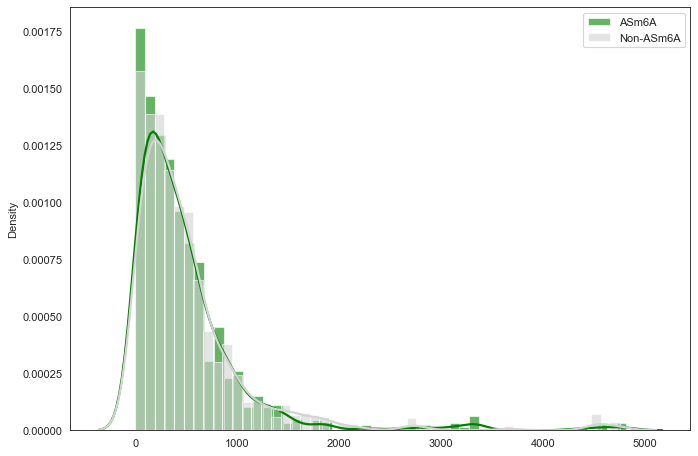

In [16]:
#### histogram plot
import seaborn as sns
sns.set_style("white")

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
# x1 = df.loc[df.cut=='Ideal', 'depth']
# x2 = df.loc[df.cut=='Fair', 'depth']
# x3 = df.loc[df.cut=='Good', 'depth']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(asm6a_list, color="g", label="ASm6A", **kwargs)
sns.distplot(unsig_list, color="lightgrey", label="Non-ASm6A", **kwargs)
# sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.legend();

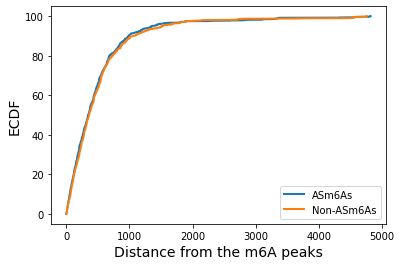

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

# sample = sample_list[8]
# dist_list = calc_dist(sample)
x_asm6a, y_asm6a = dcst.ecdf(asm6a_list)
x, y = dcst.ecdf(unsig_list)

# Plot the ECDF as dots
_ = plt.plot(x_asm6a, y_asm6a*100, lw = 2)
_ = plt.plot(x, y*100, lw = 2) # linestyle='--', 
# Label axes and show plot
_ = plt.legend(("ASm6As", "Non-ASm6As"))
_ = plt.xlabel('Distance from the m6A peaks', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()